### Micrograd example

In [102]:
from micrograd.engine import Value
import matplotlib.pyplot as plt 
import numpy as np 

def micrograd_example(a: int = -4, b: int = 2, verbose: bool = True, return_vals: bool = False):
    a = Value(a)
    b = Value(b)
    c = a + b
    d = a * b + b**3
    c += c + 1
    c += 1 + c + (-a)
    d += d * 2 + (b + a).relu()
    d += 3 * d + (b - a).relu()
    e = c - d
    f = e**2
    g = f / 2.0
    g += 10.0 / f
    g.backward()
    if verbose:
        print(f'Input "a": {a.data}. The gradient dg/da is {a.grad:.3f}')               # The numerical value of dg/da, i.e. at what slope will a change in Value(a) affect the output value g.
        print(f'Input "b": {b.data}. The gradient dg/db {b.grad:.3f}')                  # The numerical value of dg/db, i.e. at what slope will a change in Value(b) affect the output value g.
        print(f'First node "c": {c.data:.2f}. The gradient dg/dc {c.grad:.3f}')         # The numerical value of dg/dc, i.e. at what slope will a change in Value(c) affect the output value g.
        print(f'The output value of g is {g.data:.4f}\n')                               # The outcome of this forward pass 
    if return_vals:
        return a.grad, b.grad, g.data

### Here we are going to visualize the concept of editing the input values and then we will see that the output value will change with the slope of the input (if we perform only small steps)
# Initial values
a_grad, b_grad, g_out = micrograd_example(a=-4, b=2, return_vals=True)          # dg/da = 138, dg/db=646, g_out=25
# Editing the a value with a positive weight of 0.1, expecting a increase in the g_out value of approx 13.8
a_grad, b_grad, g_out = micrograd_example(a=-3.9, b=2, return_vals=True)        # dg/da = 179, dg/db=845, g_out=41
# Editing the b value with a negative weight of 0.01, expecting a decrease in the g_out value of approx 8.5
a_grad, b_grad, g_out = micrograd_example(a=-3.9, b=1.99, return_vals=True)     # dg/da = 160, dg/db=745, g_out=33


# For these small experiments, we can see how we can calculate the d_out/d_in derivatives.
# Hence, for each input (and thereby also node, if we choose to edit one of those) we can see the impact on the output value.
# We can also see that the impact of the input on the output value is proportional to the slope of the input.
# This is the concept of the gradient.

Input "a": -4. The gradient dg/da is 138.834
Input "b": 2. The gradient dg/db 645.577
First node "c": -1.00. The gradient dg/dc -6.942
The output value of g is 24.7041

Input "a": -3.9. The gradient dg/da is 179.451
Input "b": 2. The gradient dg/db 845.216
First node "c": -0.70. The gradient dg/dc -8.973
The output value of g is 40.6235

Input "a": -3.9. The gradient dg/da is 159.578
Input "b": 1.99. The gradient dg/db 744.619
First node "c": -0.74. The gradient dg/dc -8.027
The output value of g is 32.6774



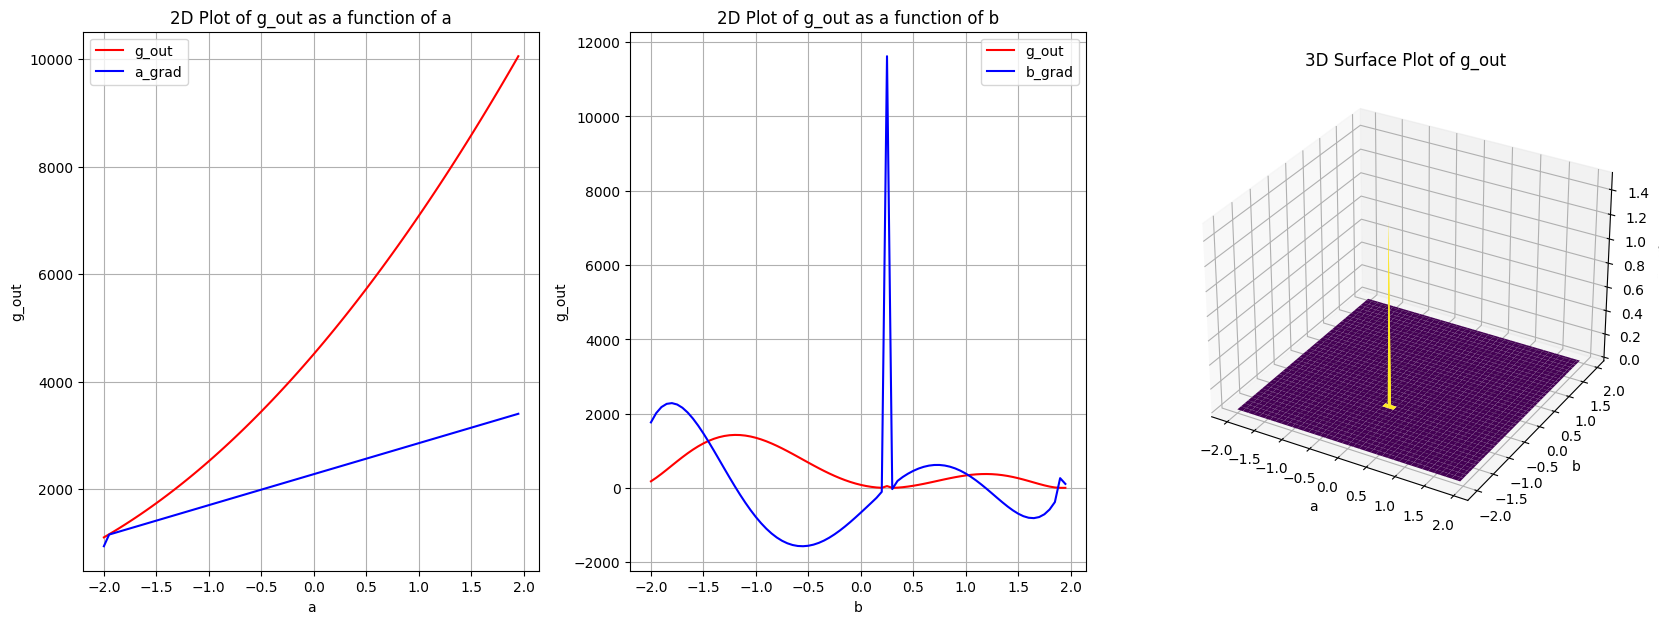

In [103]:
start_val = -2
stop_val = 2
step_val = 0.05

# Compute the output and gradients of the micrograd example with b_fixed: 2
a_list_b_fixed = np.arange(start=start_val,stop=stop_val,step=step_val)
a_grad_b_fixed_list, g_out_list_b_fixed = list(), list()
for a in a_list_b_fixed:
    a_grad, _, g = micrograd_example(a=a, b=2, verbose=False, return_vals=True)
    a_grad_b_fixed_list.append(a_grad)
    g_out_list_b_fixed.append(g)

# Compute the output and gradients of the micrograd example with a_fixed: -4
b_list_a_fixed = np.arange(start=start_val,stop=stop_val,step=step_val)
g_out_list_a_fixed, b_grad_a_fixed_list = list(), list()
for b in b_list_a_fixed:
    _, b_grad, g = micrograd_example(a=-4, b=b, verbose=False, return_vals=True)
    b_grad_a_fixed_list.append(b_grad)
    g_out_list_a_fixed.append(g)

# Compute the surface plot for edits of 'a' and 'b' 
a_list = np.arange(start=start_val,stop=stop_val,step=step_val)
b_list = np.arange(start=start_val,stop=stop_val,step=step_val)
g_out_list = []
for a in a_list:
    for b in b_list:
        _, _, g = micrograd_example(a=a, b=b, verbose=False, return_vals=True)
        g_out_list.append(g)
a_grid, b_grid = np.meshgrid(a_list, b_list)
g_out_array = np.array(g_out_list).reshape(len(a_list), len(b_list))



# Create a 3D plot
fig = plt.figure(figsize=(20,7))

# Plot the 2D line plot for the impact of a
ax1 = fig.add_subplot(131)
ax1.plot(a_list_b_fixed, g_out_list_b_fixed, color="r", label="g_out")
ax1.plot(a_list_b_fixed, a_grad_b_fixed_list, color="b", label="a_grad")
ax1.legend()
ax1.set_xlabel('a')
ax1.set_ylabel('g_out')
ax1.set_title('2D Plot of g_out as a function of a')
ax1.grid(True)

# Plot the 2D line plot for the impact of b
ax2 = fig.add_subplot(132)
ax2.plot(b_list_a_fixed, g_out_list_a_fixed, color="r", label="g_out")
ax2.plot(b_list_a_fixed, b_grad_a_fixed_list, color="b", label="b_grad")
ax2.legend()
ax2.set_xlabel('b')
ax2.set_ylabel('g_out')
ax2.set_title('2D Plot of g_out as a function of b')
ax2.grid(True)

# Plot the surface
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(a_grid, b_grid, g_out_array, cmap='viridis')

# Set labels and title
ax3.set_xlabel('a')
ax3.set_ylabel('b')
ax3.set_zlabel('g_out')
ax3.set_title('3D Surface Plot of g_out')

# Show the plot
plt.show()

# Here we can see the impact (i.e. slope/gradient) for each of the values 'a' and 'b' on the output 'g' 

# Notebook from the lecture

In [104]:
# Import used libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
# Define a simple function for a forward pass that takes as input a scalar value 
# This is the function:                           f(x)  = 3x² - 4x + 5
# The derivative of this function is given as:    f'(x) = 6x - 4 
def f(x):
  return 3*x**2 - 4*x + 5
def f_prime(x):
  return 6*x-4

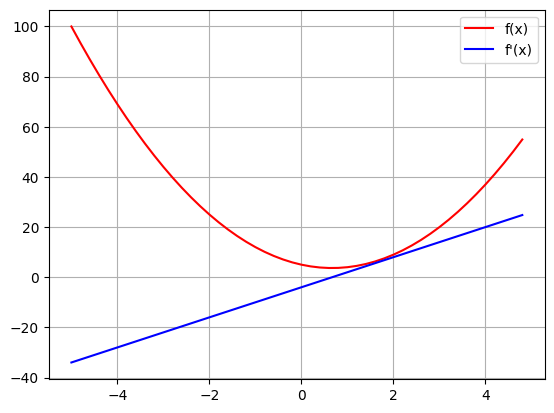

In [106]:
# Plot the function values and the derivative of the function in the range -5 : 5 
xs = np.arange(-5, 5, 0.20)
ys = f(xs)
y_prime_s = f_prime(xs)
plt.plot(xs, ys, color="red", label="f(x)")
plt.plot(xs, y_prime_s, color="blue", label="f'(x)")
plt.grid(True); plt.legend(); plt.show()

# We can calculate:
# f'(x) == 0  ->  6x-4 = 0  ->  6x=4  ->  x=4/6  ->  x=2/3 
# This means that the derivative for the function will be zero at the point x=2/3 
# This means that at the point x=2/3, the function f(x) has a local minima 
# Before this point, we can see that the derivate is negative, and after that point, the derivative is always positive
# This means that the slope of the function f(x), for x<2/3 is negative and for x>2/3, the slope is positive

In [107]:
def float_to_fraction(x: float, epsilon: float = 0.001) -> str:
    """
    Convert a floating-point number to a string representation of a fraction within the given epsilon tolerance.

    This function approximates the input floating-point number `x` to the closest fraction with a tolerance defined by
    the epsilon value. It continues to increase the numerator and denominator of the fraction until the absolute
    difference between `x` and the fraction is smaller than the specified epsilon.

    Parameters:
        x (float): The input floating-point number to be converted to a fraction.
        epsilon (float, optional): The tolerance value for approximation. Default is 0.0001.

    Returns:
        str: A string representation of the fraction approximating the given floating-point number `x`.

    Notes:
        The function uses a simple iterative method to approximate the fraction. While it may provide an acceptable fraction for certain cases, it might not always yield the simplest form of the fraction.
        The default epsilon value is set to 0.0001, which can be adjusted based on the desired precision of the conversion.
        The provided example demonstrates the usage of the function with different inputs and epsilon values. The output shows the resulting simplified fraction representation.

    Example:
        float_to_fraction(0.333)  # Output: "33/100"
        float_to_fraction(0.123456, epsilon=0.00001)  # Output: "10/81"
    """
    numerator = 1
    denominator = 1
    while abs(x - numerator / denominator) > epsilon:
        if x > numerator / denominator:
            numerator += 1
        else:
            denominator += 1
    return f"{numerator}/{denominator}"

In [108]:
# Numerical verification using the definition of the derivative -> https://en.wikipedia.org/wiki/Derivative#Definition
# f'(x) = Lim(h->0) (f(x+h)-f(x))/h
# i.e. we can see that the derivative is defined as the slope of the tangent line between two points on a curve, 
# where the distance between these two points goes towards zero 

# Hence, we can numerically verify that the derivative of f(x) is zero by computing the slope of the tangent line at x and x+h
# f'(x) = (f(x+h) - f(x))/h
h = 0.000001
x = 2/3
zero_slope = (f(x + h) - f(x))/h
print(f"We can see that at the point x={float_to_fraction(x)} the slope of the function is {zero_slope}")           # The slope is here as close to zero as possible ... 

We can see that at the point x=2/3 the slope of the function is 2.999378523327323e-06


In [109]:
# Lets get more complex and define a function (a,b,c) = a*b+c 
def func(a,b,c):
    return a*b+c

# Define the values 
a = 2.0
b = -3.0
c = 10.0
d = func(a,b,c)

print(f"For the values a: {a}, b: {b}, c: {c} the result is: {d}")

For the values a: 2.0, b: -3.0, c: 10.0 the result is: 4.0


In [110]:
# Now create a numerical verification of the slope of the function func(a,b,c) by bumping the inputs with a small value h
h = 0.0001

# Inputs and bumped inputs
a = 2.0;    a_bumped = a+h
b = -3.0;   b_bumped = b+h
c = 10.0;   c_bumped = c+h

# Compute the slope of the function func(a,b,c)
d_a_bumped = func(a_bumped, b, c)
d_b_bumped = func(a, b_bumped, c)
d_c_bumped = func(a, b, c_bumped)

# Compute the slope of the function)
slope_for_a = (d_a_bumped-d) / h
slope_for_b = (d_b_bumped-d) / h
slope_for_c = (d_c_bumped-d) / h

# Print the numerical verification of the slope of the function
# The slopes won't be exactely as expected due to floating point arithmetics, i.e. even these double (float64) is not a continuous variable 
print("The slope for a is: ", slope_for_a)
print("The slope for b is: ", slope_for_b)
print("The slope for c is: ", slope_for_c)

# Mathematically we can also verify these slopes by differentiating the function func with respect to the input variables a, b and c 
# When differentiating with respect to a, we keep b and c as constants, hence c will dissapear and the derivative will then be     ->  dfunc/da = b = -3
# When differentiating with respect to b, we keep a and c as constants, hence c will dissapear and the derivative will then be     ->  dfunc/db = a = 2
# When differentiating with respect to c, we keep a and b as constants, hence they will dissapear and the derivative will then be  ->  dfunc/dc = c = 1 

The slope for a is:  -3.000000000010772
The slope for b is:  2.0000000000042206
The slope for c is:  0.9999999999976694


### Micrograd

In [111]:
class Value:
  """
  The Value class is simply a small class defining Micrograd, which is a library similair to AutoGrad (Automatic Gradient) from PyTorch. 
  The Value class can be interpreted as a single neuron in a layer in a fully connected network
  The Value class will be capable of performing simple operations like addition, subtraction, exponentiation etc. in both a forward and backward pass 

  Remember that the backpropagation is defined using the chain rule => https://mathinsight.org/chain_rule_simple_examples
  The chain rule states, that if we have a function of a function, then the derivative is given as the derivative of the outer function with respect to the inner function times the derivative of the inner function 
  if:     f(x) = sin(x)²  
  then:   df/dx           ->    d(sinx)² / d(sinx) * d(sinx)/dx 
  As we want to propagate the gradient down the network we can see each of the operations completed by these Value objects as inner functions affecting the outer function and hence the output of the network 

  The expressions (operations) supported here in the Value class doesn't have to be the small, basic operations like additions, subtractions, multiplications etc.
  As long as we can define both the forward pass and the local gradient for each operation, we can implement the operation here as a supported operation 
  Actually, as long as we know the forward and backward functions of an operation, that can also be implemented in pure pytorch, if we wanted to do that... 

  In this class we have implemented a lot of _backward functions for each operation
  The goal of these _backward functions is to back propagate the gradient of the out's values further down through the network 
  i.e. the _backward() functions will route the gradient for the Value calling the _backward down through the network into the children Value objects, that were creating the out Value.
  This is also why we initiate the _backward as the empty None function, such that we can call the function, but nothing will happen, if we have no way of backpropagating the gradient for the Value
  Notice that we have to use += for the local _backward functions for each of the supported operations!

  Again, note that we are using the chain rule for backpropagation, which states dz/dx = dz/dy * dy/dx
  Hence, as we always want to compute dL/dp, where p is any parameter of our network, we need to compute the local derivative of the operation that created the 'p' Value. This will be interpreted as dy/dx (the inner function)
  Hence, this local gradient will then have to be multiplied to the outer gradient, interpreted as dz/dy, which we gain from the "out" Value object, i.e. the Value that was the output of the current 'p' Value parameter 
  Thus, as these _backward functions are assigning gradients to 'self' and 'other', but when they are run from 'out' we are referencing child Value objects which we can then assign gradient values to
  Thus, by performing the backpropagation from the output all the way to the input we can keep the chain rule in this single expression dz/dx = dz/dy * dy/dx, even though we are passing more layers, as dz/dy can be the gradient already computed using the chain rule through multiple layers.
  Hence, this is why in all _backward functions we have to multiply with the out.grad, as this out.grad is interpreted as the dz/dy (outer function) and the local grad for the specific operation, is then multiplied on to it 
  """
  def __init__(self,
              data,                                             # The data (number/variable) that this Value class holds 
              _children=(),                                     # The initial children of this instance, i.e. which Value instances was used to create this new one as each operation (e.g. addition, subtraction, multiplication etc) will create a new Value object 
              _op='',                                           # Define the operations used to create this new Value object 
              label=''):                                        # Assign a label (i.e. name) for this current Value object, this could e.g. be 'loss' for the Loss Value object 
    
    # Assign the input variables to the Value object initiated here
    self.data = data                                            # Assign the value provided to the Value object 
    self.grad = 0.0                                             # The initial gradient will be set to 0 
    self._backward = lambda: None                               # The initial backward function will be None, i.e. an empty function that doesn't do anything. This is e.g. for leaf nodes, where we can't backpropagate any gradient 
    self._prev = set(_children)                                 # Assign the previous used Values as a set (for efficiency compared to a Tuple) 
    self._op = _op                                              # Assign the operation used/provided to this Value object 
    self.label = label                                          # Assign the label (i.e. name) provided/given for this Value object 

  
  ### __repr__ will allow us to print out the class instance in a nice, more pretty way.
  # i.e. this function defines what will be printed, when we call print(self) 
  def __repr__(self):
    return f"Value(data={self.data})"
  

  ### When adding two Value instances, i.e. a+b is actually called as a.__add__(b). i.e. defining this function will now let Python know how to perform this operation 
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)                         # If the input "other" is not of class value, create a Value object of the input 
    out = Value(data=self.data + other.data, _children=(self, other), _op='+')          # Create an output Value object which is the result of addition between the two Value objects, self and other 
    

    """
    Define the single backward function for this addition operation
    
    From calculus we know that:
    if:     f(x,y) = x+y
    then:   df/dx = 1.0     &&    df/dy = 1.0
    
    i.e. the addition operation will simply 'bypass' the already computed gradient further down through the network 
    This _backward function will be run in order to compute the backward pass (i.e. backpropagation) through the entire network of Values with different operations 
    This _backward function will then be used in combination with the chain rule in order to compute the gradient (i.e. slope) of all Value objects affecting one or more output Value objects (i.e. the Value object initiating this _backward call) 
    """
    def _backward():
      self.grad += 1.0 * out.grad                                                       # Assign the gradient to the 'self' Value object 
      other.grad += 1.0 * out.grad                                                      # Assign the gradient to the 'other' Value object
    out._backward = _backward                                                           # Assign this _backward function as the _backward function for the newly created 'out' Value object 
    return out


  ### When multiplying two values together, Python will call the __mul__ function, i.e. a.__mul__(b) is equal to a*b 
  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)                         # If the input "other" is not of class value, create a Value object of the input 
    out = Value(data=self.data * other.data, _children=(self, other), _op='*')          # Create a new Value object as the output of the multiplication 
    
    """
    Define the single backward function for this multiplication operation 

    From calculus we know that:
    if:     f(x,y) = x+y
    then:   df/dx = y     &&    df/dy = x
    i.e. when differentiating (x*y) with respect to 'x', we get y, and vice versa 

    Hence, in order to complete the backpropagation using the chain rule, we need to multiply the data from the opposite Value with the gradient coming from the output (i.e. chain rule again) 

    """
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  

  ### Defining the __pow__ function will allow us to use the '**' operator to raise a Value object to a power 
  # note: this function will only support integer and float powers for now 
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  

  ### __rmul__ is the function for opposite multiplication, i.e. we have defined a.__mul__(b), but we have not defined b.__mul__(a). 
  # Hence, here, __rmul__ will allow us to use the '*' operator to perform opposite multiplication, i.e. b*a 
  def __rmul__(self, other): # other * self
    return self * other


  ### __truediv__ is the function called when we call a/b, i.e. a.__truediv__(b) is equal to a/b 
  # Hence, this function will allow us to use the '/' operator to perform division 
  # However, division is a special case of raising something to the power of x, i.e. a/b == a*(1/b) == a*(b**-1)
  # Hence, we can use the __pow__ function as well as the __mul__ function to perform division
  def __truediv__(self, other): # self / other
    return self * other**-1


  ### Define what happens if we call -self 
  def __neg__(self): # -self
    return self * -1


  ### When we subtract a variable from our Value, Python will call __sub__, i.e. a-b == a.__sub__(b) 
  # Note that this is implemented using the __add__ function and the __neg__ function 
  def __sub__(self, other): # self - other
    return self + (-other)


  ### Again, reverse add, if we call b+a Python will call b.__add__(a), which might not be implemented, so __radd__ will try to see if a.__add__(b) is implemented 
  def __radd__(self, other): # other + self
    return self + other


  ### The tanh activation function 
  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    # Backward for the tanh function 
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    return out
  
  


  ### This creates a list of a topological sorted list of all parameters of the network
  # i.e. this means that this function will loop through all parameters in the network and then only assign the parameter to the list if all of it's children is assigned to the list 
  # Hence, this will assure that all parameters will be assigned in the chronologically order that they are used in the network 
  def backward(self, reset_gradients_before_backprop: bool = True):
    topo = []                             # We start by initiating an empty list, that will be filled with all neurons in the correct topological order 
    visited = set()                       # Then we initiate an empty set that will keep track of all neurons that we have already added to the list 
    def build_topo(v):                    # Define the build_topo function, that takes in a single node  
      if v not in visited:                # If the current node is not in the "visited" set ...
        visited.add(v)                    # ... add the node to the set ...
        for child in v._prev:             # ... and loop through each of the child nodes ...
          build_topo(child)               # ... and call build_topo for each of these child nodes 
        topo.append(v)                    # After calling the build_topo for each child node, we can append this current node to the list, hence we will recursively iterate down to the first node, and then the second node and so forth ...
    build_topo(self)                      # Build the topological sorted list, starting from the current 'self' Value object 
    
    # Perform the backward propagation 
    # Note here that the _backward function is called on all nodes, hence even leafe notes, where we can't backpropagate the gradient, hence that is why the _backward is initiated as the None function ... 
    if reset_gradients_before_backprop:   # If we chose (as default) to reset gradients to 0 for all parameters before re-calculating ...
      for node in topo:                   # ... iterate through all the parameters of the network ...
        node.grad = 0                     # ... and set their gradients to 0 (as it's the default value also set in the __init__ function) 
    self.grad = 1.0                       # At first, assign the gradient for the current node to be 1.0, as dL/dL=1, hence we avoid multipling by zero after resetting gradients...
    for node in reversed(topo):           # Iterate through all the nodes (parameters) detected in the topological list, in reverse order (from right to left) ...
      node._backward()                    # ... and backpropagate the gradient using the _backward function

In [112]:
from graphviz import Digraph
from typing import Tuple, Set, Any

def trace(root: Any) -> Tuple[Set[Any], Set[Tuple[Any, Any]]]:
    """
    Trace the graph of a given root node and construct sets of nodes and edges.

    This function traverses the graph starting from the provided root node. It builds two sets:
    1. A set of all unique nodes in the graph.
    2. A set of edges as tuples of parent-child pairs in the graph.

    Parameters:
        root (Any): The root node of the graph.

    Returns:
        Tuple[Set[Any], Set[Tuple[Any, Any]]]: A tuple containing the set of nodes and the set of edges in the graph.

    Note:
        - The function expects the input graph to be in the format where each node has a '_prev' attribute containing a list of its children nodes.
    """
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
      if v not in nodes:
        nodes.add(v)
        for child in v._prev:
          edges.add((child, v))
          build(child)
    build(root)
    return nodes, edges

def draw_dot(root: Any, direction: str = "LR", color_text: bool = False, format: str = "svg") -> Digraph:
    """
    Create a graph visualization using Graphviz (Dot format) based on the provided root node.

    This function generates a graph visualization for the graph represented by the provided root node.
    Each node in the graph is displayed as a rectangular ('record') node, and if the node corresponds
    to an operation, a separate operation node is created and connected to the node.

    Parameters:
        root (Any):         The root node of the graph to be visualized.
        direction (str):    The direction of the graph. Can be either LR (left right) or TP (top down)
        color_text (bool):  Whether or not the labels of the graph will be colored using various text colors 
        format (str):       The format of the graphviz object to be returned.

    Returns:
        Digraph: A Graphviz Digraph object representing the graph visualization.

    Note:
        - The function relies on the 'trace' function to build the set of nodes and edges in the graph.
        - The 'record' node label includes information about the node's label, data, and gradient.
        - The '_op' attribute of each node is used to indicate whether it corresponds to an operation node.
        - The graph is constructed in a left-to-right direction for better visualization (rankdir='LR').
    """
    dot = Digraph(format=format, graph_attr={'rankdir': direction}) # LR = left to right
    
    nodes, edges = trace(root)
    for n in nodes:
      uid = str(id(n))
      # for any value in the graph, create a rectangular ('record') node for it
      fontcolor = "black"
      if color_text:
          if "L" in n.label: fontcolor = "red"
          if "f" in n.label: fontcolor = "olive"
          if "e" in n.label: fontcolor = "teal"
          if "d" in n.label: fontcolor = "darkgreen"
          if "c" in n.label: fontcolor = "navy"
          if "b" in n.label: fontcolor = "deeppink"
          if "a" in n.label: fontcolor = "peru"
      dot.node(name=uid, label=f"{{ {n.label} | data {n.data:.4f} | grad {n.grad:.4f} }}", shape='record', fontcolor=fontcolor)
      if n._op:
        # if this value is a result of some operation, create an op node for it
        dot.node(name = uid + n._op, label = n._op, fontcolor="black")
        # and connect this node to it
        dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
      # connect n1 to the op node of n2
      dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot


In [113]:
# Showcase an example usage of the micrograd repo 
a = Value(2.0, label='a')           # Initiate an input Value a
b = Value(-3.0, label='b')          # Initiate an input Value b
c = Value(10.0, label='c')          # Initiate a leaf Value c
d = a*b; d.label = 'd'              # Compute a hidden Value d
e = d + c; e.label = 'e'            # Compute a hidden Value e
f = Value(-2.0, label='f')          # Initiate a leaf Value f
L = e * f; L.label = 'L'            # Compute the final output Value L
print(f"This is the output value L: {L.data}")

This is the output value L: -8.0


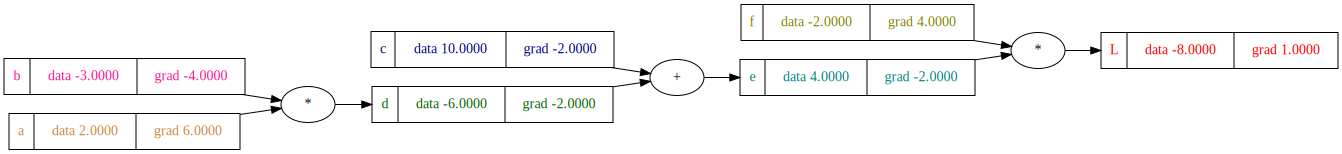

In [114]:
"""
The most simple case:
    Compute the gradient of L with respect to L, i.e. compute dL/dL
    L = L           ->      dL/dL = 1 
"""
L.grad = 1

"""
How is L sensitive to f and e? I.e. what is the slope of the derivative of the output L in the direction of f and e?
    We know that the output Value L is given as L=f*e, hence we can compute the two partial derivatives of the function
    L in order to compute the gradients 
    L = f*e         ->      dL/de = f   &&   dL/df = e 
"""
f.grad = e.data 
e.grad = f.data 

"""
Now the tricky part. How is L sensitive to c and d? This is where the chain rule will be applied, as we intuitively see that, as c
and d is affecting e, that is affecting L, then L must be affected by c and d as well...
    We can see that c+d = e, hence we need to first compute the local derivatives de/dc and de/dd.
    e = c+d         ->      de/dc = 1   &&   de/dd = 1

However, we want to know dL/dc (as well as dL/dd).
    As the chain rule states: dL/dc = (dL/de) * (de/dc)
    From the earlier computations we computed dL/de = f.data = -2 and we just computed the local derivative de/dc to be 1,
    hence we can now use the chain rule to compute dL/dc
    dL/de = -2   &&   de/dc = 1    ->   dL/dc = (dL/de) * (de/dc) = -2 * 1 = -2
    
The same goes for dL/dd:
    dL/de = -2   &&   de/dd = 1    ->   dL/dd = (dL/de) * (de/dd) = -2 * 1 = -2
"""
c.grad = -2 
d.grad = -2

"""
Now we simply need to continue down this path of using the chain rule, when we need to compute dL/da and dL/db
    Again, at first we need to compute the local derivative dd/da and dd/db
    d = a*b         ->      dd/da = b   &&   dd/db = a 

Now we have to apply the chain rule to these calculations. From before, we have that dL/dd = -2 
    dL/da = (dL/dd) * (dd/da)  =  -2 * b  =  -2 * -3  =  6
    dL/db = (dL/dd) * (dd/db)  =  -2 * a  =  -2 *  2  = -4
"""
a.grad = 6 
b.grad = -4


# Draw the network graph
dot = draw_dot(L, direction="LR", color_text=True, format="svg")
dot

In [115]:
def numerical_gradient_verification(bump_a=False, bump_b=False, bump_c=False, bump_d=False, bump_e=False, bump_f=False, bump_L=False):
    # The first forward pass without any bumps 
    a = Value(2.0, label='a')  
    b = Value(-3.0, label='b') 
    c = Value(10.0, label='c') 
    d = a*b; d.label = 'd'     
    e = d + c; e.label = 'e'   
    f = Value(-2.0, label='f') 
    L = e * f; L.label = 'L'   
    L1 = L.data
    
    # The second forward pass, with a slight bump of one of the values
    h = 0.00001
    a = Value(2.0, label='a')  
    if bump_a: a.data += h
    b = Value(-3.0, label='b') 
    if bump_b: b.data += h
    c = Value(10.0, label='c') 
    if bump_c: c.data += h 
    d = a*b; d.label = 'd'     
    if bump_d: d.data += h
    e = d + c; e.label = 'e'   
    if bump_e: e.data += h
    f = Value(-2.0, label='f') 
    if bump_f: f.data += h
    L = e * f; L.label = 'L'   
    if bump_L: L.data += h
    L2 = L.data
    
    slope = (L2-L1) / h
    return slope 

# Numerically verify the numerical derivative value for each of the nodes 
print(f"Analyticalle we computed dL/dL to be {L.grad}.".ljust(43) + f"Now we bump 'L' by a small amount to numerically compute the gradient of L to be: {numerical_gradient_verification(bump_L=True)}")
print(f"Analyticalle we computed df/dL to be {f.grad}.".ljust(43) + f"Now we bump 'f' by a small amount to numerically compute the gradient of f to be: {numerical_gradient_verification(bump_f=True)}")
print(f"Analyticalle we computed de/dL to be {e.grad}.".ljust(43) + f"Now we bump 'e' by a small amount to numerically compute the gradient of e to be: {numerical_gradient_verification(bump_e=True)}")
print(f"Analyticalle we computed dd/dL to be {d.grad}.".ljust(43) + f"Now we bump 'd' by a small amount to numerically compute the gradient of d to be: {numerical_gradient_verification(bump_d=True)}")
print(f"Analyticalle we computed dc/dL to be {c.grad}.".ljust(43) + f"Now we bump 'c' by a small amount to numerically compute the gradient of c to be: {numerical_gradient_verification(bump_c=True)}")
print(f"Analyticalle we computed db/dL to be {b.grad}.".ljust(43) + f"Now we bump 'b' by a small amount to numerically compute the gradient of b to be: {numerical_gradient_verification(bump_b=True)}")
print(f"Analyticalle we computed da/dL to be {a.grad}.".ljust(43) + f"Now we bump 'a' by a small amount to numerically compute the gradient of a to be: {numerical_gradient_verification(bump_a=True)}")

Analyticalle we computed dL/dL to be 1.    Now we bump 'L' by a small amount to numerically compute the gradient of L to be: 0.9999999999621422
Analyticalle we computed df/dL to be 4.0.  Now we bump 'f' by a small amount to numerically compute the gradient of f to be: 4.000000000026205
Analyticalle we computed de/dL to be -2.0. Now we bump 'e' by a small amount to numerically compute the gradient of e to be: -1.9999999999242843
Analyticalle we computed dd/dL to be -2.   Now we bump 'd' by a small amount to numerically compute the gradient of d to be: -1.9999999999242843
Analyticalle we computed dc/dL to be -2.   Now we bump 'c' by a small amount to numerically compute the gradient of c to be: -1.9999999999242843
Analyticalle we computed db/dL to be -4.   Now we bump 'b' by a small amount to numerically compute the gradient of b to be: -4.000000000026205
Analyticalle we computed da/dL to be 6.    Now we bump 'a' by a small amount to numerically compute the gradient of a to be: 6.0000000

In [116]:
### Here is a small example of how we would now use these gradient computations to edit the output of the network 
# Let's say that we want to increase the value of the output L, i.e. that we want to make it less negative (remember, at the moment, L = -8)  
# In order to do so, we have to look at the nodes affecting our output L, and their gradients with respect to L, that we just computed 
# Hence, if we want to increase L, and we know that the gradient will point in the direction of the steepest ascent,
# then we simply need to increase the values of our parameters in the direction of the gradient
# We only use a small stepsize, as the computations for the gradients are unsure, as they are first order estimates,
# hence the computed gradients is only true within a very small stepsize of our current position in the manifold 


# Let's now increase the value of L by using the gradients 
from copy import deepcopy
if L.data == -8:
    old_L_value = deepcopy(L.data)
print(f"This is the original, old value of L: {old_L_value}")
if L.data == -8:
    a.data += 0.01 * a.grad
    b.data += 0.01 * b.grad
    c.data += 0.01 * c.grad
    f.data += 0.01 * f.grad

    # Compute a new forward pass to compute the updated value of L
    d = a*b
    e = d + c
    L = e * f

print(f"Now the parameters have been updated such that L has increased from {old_L_value:.3f} to {L.data:.3f}, which is an increase of {(L.data - old_L_value):.3f}")


This is the original, old value of L: -8.0
Now the parameters have been updated such that L has increased from -8.000 to -7.286, which is an increase of 0.714


### Create toy neuron

In [117]:
### Here we create a toy neuron with intermediate nodes, in order to retain pointers to all intermediate operations inside the neuron
# We know that a completely basic neuron inside a fully connected layer will perform:
    # 1) dot product between the inputs and weights
    # 2) add with the bias (which control trigger-happiness of the neuron)
    # 3) Typically perform some non-linear operation as well, e.g. tanh, which we have also implemented in the Value class 
# When we call the backward function for o.backward

### Use composite tanh function 
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'

o.backward()

The output value of o: 0.7071 with grad: 1.0
The gradients of the inputs:
x1.grad: -1.5000, w1.grad: 1.0000, x2.grad: 0.5000, w2.grad: 0.0000


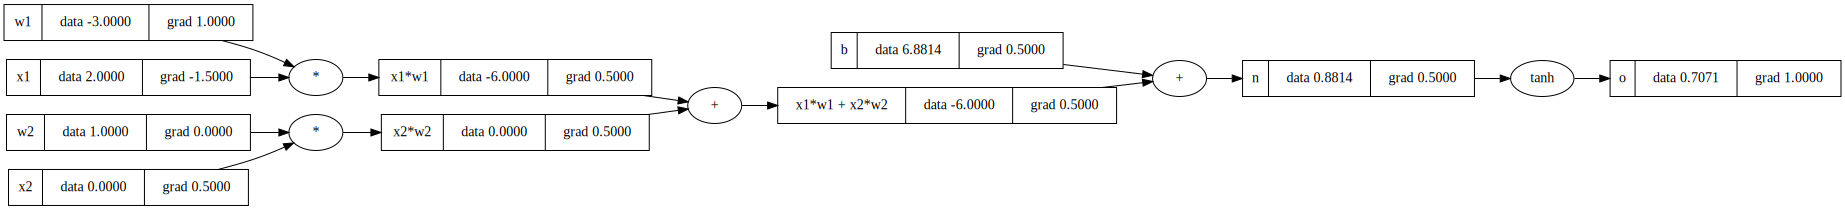

In [118]:
# Draw the network where we explicitly use the tanh function
print(f"The output value of o: {o.data:.4f} with grad: {o.grad}")
print(f"The gradients of the inputs:\nx1.grad: {x1.grad:.4f}, w1.grad: {w1.grad:.4f}, x2.grad: {x2.grad:.4f}, w2.grad: {w2.grad:.4f}")
draw_dot(o)

In [119]:
### Now explicitly write out the tanh function in order to showcase that it doesn't matter how we implement support for our operations, and that writing out the tanh in 
### smaller piece-wise functions is equivalent to using the "composite" tanh function as both the forward pass and the backward pass will be equivalent  
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

e = (2*n).exp(); e.label="e^2n"
o2 = (e-1) / (e+1); o2.label = "out"
o2.backward()

The output value of o2: 0.7071 with grad: 1.0
The gradients of the inputs:
x1.grad: -1.5000, w1.grad: 1.0000, x2.grad: 0.5000, w2.grad: 0.0000


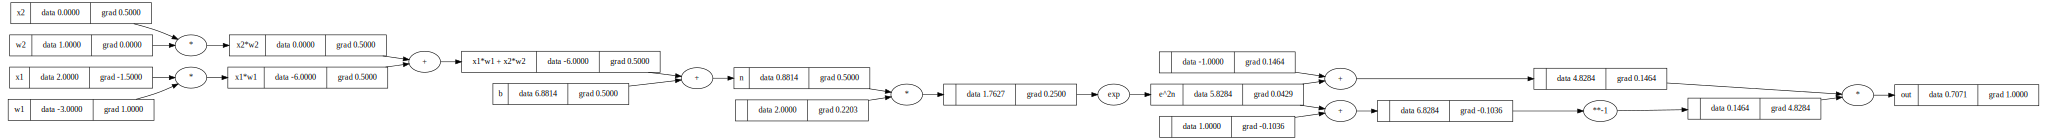

In [120]:
# Draw the network where we write out the tanh function
print(f"The output value of o2: {o2.data:.4f} with grad: {o2.grad}")
print(f"The gradients of the inputs:\nx1.grad: {x1.grad:.4f}, w1.grad: {w1.grad:.4f}, x2.grad: {x2.grad:.4f}, w2.grad: {w2.grad:.4f}")
draw_dot(o2)

#### Torch

In [121]:
# PyTorch is the framework we would use in production
# In PyTorch everything is centered around it's 'Tensors', which are simply N-dimensional arrays. In Micrograd we only used scalar values. 
# We can convert a scalar to a tensor using the 'Tensor' class.
# We can also convert a tensor to a scalar using the 'item' method.
# Python is by default using double precision for its floating point numbers, where as PyTorch uses single precision.
# We can change this by using the 'double' method, such that the precision is matching 
# By default, Tensors do not require gradients, for efficiency reasons, to e.g. remove gradients for leaf nodes or input tensors. Hence, we set requires_grad==True 
# Similar to micrograd, pytorch tensors will have a .data and .grad method to access the data and gradients respectively.
# Because we are working with Tensor objects, everything will be much more efficient compared to micrograd 

import torch
x1 = torch.Tensor([2.0]).double()                ; x1.requires_grad = True
x2 = torch.Tensor([0.0]).double()                ; x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()               ; w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()                ; w2.requires_grad = True
b = torch.Tensor([6.8813735870195432]).double()  ; b.requires_grad = True
n = x1*w1 + x2*w2 + b
o3 = torch.tanh(n)
o3.backward()

# We check that the output value and gradients of the inputs are similar to the ones we computed with micrograd 
print(f"The output value of o3: {o3.data.item():.4f} with a None grad (as is default for the PyTorch node that calls the backward() function)")
print(f"The gradients of the inputs:\nx1.grad: {x1.grad.item():.4f}, w1.grad: {w1.grad.item():.4f}, x2.grad: {x2.grad.item():.4f}, w2.grad: {w2.grad.item():.4f}")

The output value of o3: 0.7071 with a None grad (as is default for the PyTorch node that calls the backward() function)
The gradients of the inputs:
x1.grad: -1.5000, w1.grad: 1.0000, x2.grad: 0.5000, w2.grad: 0.0000


### MLP from micrograd

In [122]:
import random 

# Here we define a Neuron, Layer and MLP class 

class Neuron:
  """
  The Neuron class will be used to create a neuron that takes in a list of inputs and returns a single scalar output
  The __call__ (i.e. forward pass) will compute the dot product between weights and inputs, add with the bias and then perform the tanh nonlinearity 
  """
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]        # Create a list of Value objects (weights) sampled from a normal distribution, one for each input dimension 
    self.b = Value(random.uniform(-1,1))                              # Initialize the bias as being sampled from a normal distribution 
  
  def __call__(self, x):
    # out = f(W * X + b)
    act = sum((wi*xi for wi, xi in zip(self.w, x)), start=self.b)     # Perform the dot product between the weights and inputs and add with the bias 
    out = act.tanh()                                                  # Perform the tanh activation function 
    return out
  
  def parameters(self):
    return self.w + [self.b]                                          # Assign all the parameters in this Neuron to be each of the weights and the bias 

class Layer:
  """
  The Layer class will simply initiate several Neurons inside a list in order to form a single layer of a neural network 
  This Layer class will hence take the number of inputs to the layer as well as the number of output neurons from this layer
  """
  def __init__(self, nin, nout, **kwargs):
    self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]
  
  # The __call__ (forward function) will simply stack all the outputs from forwarding the input through each neuron in this given layer, in a list 
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  """
  This MLP class will be able to create several layers with several neurons in order to create a whole neural network
  The MLP class will hence take the number of input features to the network as one input parameter as well as a list of the number of neurons wanted in the intermediate layers 
  """
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  # The forward function here will simply insert the input through all of the layers in the MLP, one layer at a time.
  # Hence, this is equal to the input being fed through all neurons from left to right in this network 
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


In [128]:
# Create a single toy network which takes as input three feature vectors, has two hidden layers both of size 4, and then outputs a single scalar value 
n = MLP(3, [4, 4, 1])
print(f"This MLP has {len(n.parameters())} parameters")

# Create a toy input dataset consisting of four feature vectors and four targets
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0]     # desired targets

# Perform the forward pass for each of these input vectors, using the MLP, to compute a new predicted value for each of the inputs 
y_preds = [n(x) for x in xs]    # predicted values, a forward pass for each input vector 

# Compute the initial MSE loss
# This loss is used to have a single scalar value that will tell us how well our network is performing
# Hence, we want to minimize the loss as much as possible 
# As we are doing regression here, the MSE loss is a pretty neat loss to implement 
MSE_loss = sum((y_pred-y_gt)**2 for y_pred, y_gt in zip(y_preds, ys)) / len(y_preds)
print(f"The initial MSE loss is {MSE_loss.data:.4f}")

This MLP has 41 parameters
The initial MSE loss is 0.8971


In [124]:
# Note here what a gigantic graph is being created by visualizing this small network.
# This graph will display all the weights and biases in the network as well as all connections between neurons and how the information will flow 

# draw_dot(MSE_loss)

In [125]:
# Write up a proper training loop where we are going to train for a number of iterations
num_iterations = 200

# Training loop 
for k in range(num_iterations):
  
  # forward pass in each iteration on the entire dataset - this is NOT a minibatch 
  ypreds = [n(x) for x in xs]                                               # Feed the entire four input vectors through our network, one at a time 
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypreds))/len(y_preds) # Compute the MSE loss for the entire dataset here
  
  # backward pass - at first, we set all the gradients of all the parameters to 0 
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()                                                           # Compute the backward pass, i.e. the gradient for each neuron in the network 
  
  # Update the parameters of the network 
  for p in n.parameters():
    p.data += -0.05 * p.grad
  
  # Print the loss every 10 steps 
  if (k+1) % 10 == 0 or k==0:
    print(f"For the {k+1:d}. iteration we are having a loss of {loss.data:.4f}")
  

For the 1. iteration we are having a loss of 1.7427
For the 10. iteration we are having a loss of 0.5958
For the 20. iteration we are having a loss of 0.3270
For the 30. iteration we are having a loss of 0.0801
For the 40. iteration we are having a loss of 0.0360
For the 50. iteration we are having a loss of 0.0228
For the 60. iteration we are having a loss of 0.0165
For the 70. iteration we are having a loss of 0.0129
For the 80. iteration we are having a loss of 0.0106
For the 90. iteration we are having a loss of 0.0089
For the 100. iteration we are having a loss of 0.0077
For the 110. iteration we are having a loss of 0.0068
For the 120. iteration we are having a loss of 0.0060
For the 130. iteration we are having a loss of 0.0054
For the 140. iteration we are having a loss of 0.0050
For the 150. iteration we are having a loss of 0.0045
For the 160. iteration we are having a loss of 0.0042
For the 170. iteration we are having a loss of 0.0039
For the 180. iteration we are having a 

In [126]:
# Visualize the y_preds as they are after training, and verify that they are looking very close to our target values of [1, -1, -1, 1] 
ypreds

[Value(data=0.9413982912662738),
 Value(data=-0.9788249610210861),
 Value(data=-0.9322225483224441),
 Value(data=0.9341213414771972)]